In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.metrics import plot_confusion_matrix, roc_curve, auc
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import ADASYN
from scipy.stats import uniform

In [2]:
df = pd.read_csv(r"\final_clean_dataset.csv")

In [3]:
X = df[['duration_ms', 'popularity', 'danceability',
       'energy', 'speechiness', 'instrumentalness', 'liveness', 'valence',
       'time_signature', 'n_beats', 'fade_out_duration',
       'primary_artist_popularity', 'average_artists_popularity',
       'sum_of_followers', 'explicit']].values
y = np.array(df['genre'])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=94, stratify=y)

In [5]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

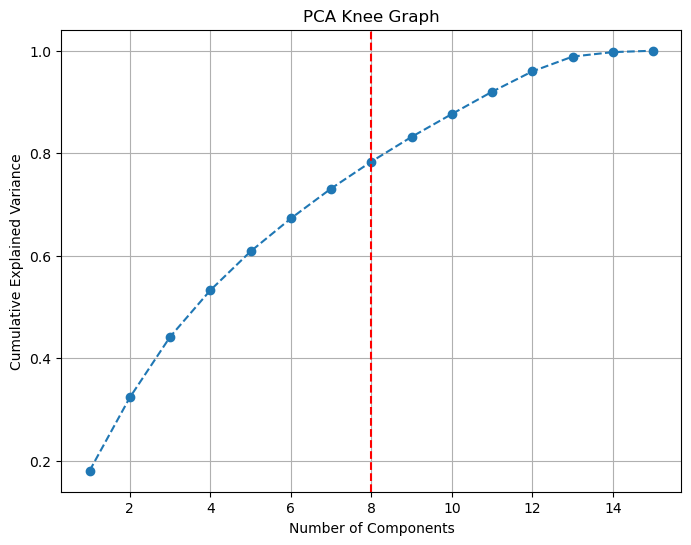

In [14]:
# Assume X_train is already defined
pca = PCA()
pca.fit(X_train)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Plotting the knee graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Knee Graph')
plt.axvline(x=8, color='r', linestyle='--')  # Assuming you want to highlight n_components=2
plt.grid(True)
plt.show()

In [7]:
### Choice n=8.

pca = PCA(n_components=8)
pca.fit(X_train)
X_pca = pca.transform(X_train)

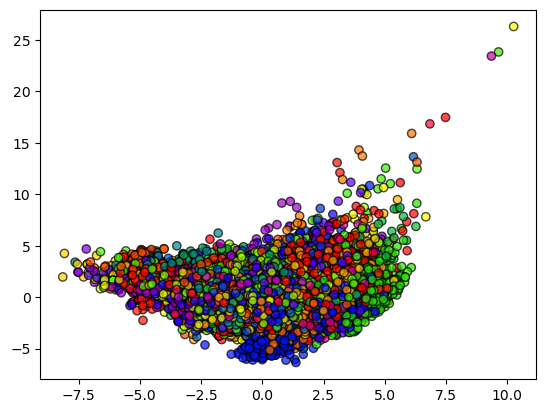

In [8]:
# Assume y_train is your array of labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Now use the encoded labels for coloring
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train_encoded, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

## Linear SVM

#### C = 1.0

In [26]:
clf = LinearSVC(C=1.0, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

C:\Users\rugge\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy 0.22215909090909092
F1-score [0.         0.07954545 0.         0.00784314 0.28263473 0.
 0.36162362 0.19312602 0.         0.01923077 0.06760563 0.
 0.14102564 0.33608815 0.26887967 0.01058201 0.35616438 0.00655738
 0.54825175 0.18670077 0.16438356 0.03861004 0.05957447 0.0456621
 0.3378545  0.         0.07792208 0.29476584 0.00787402 0.
 0.         0.         0.         0.06222222 0.         0.27591707
 0.         0.13438735 0.0212766  0.00769231 0.05761317 0.
 0.56756757 0.         0.20531401 0.06896552 0.29756795 0.00925926
 0.04761905 0.19640387 0.2022792  0.20828905 0.37589377 0.18479532
 0.13300493 0.02684564 0.         0.         0.03184713 0.67088608
 0.23414634 0.24336973 0.         0.         0.27357238 0.18801653
 0.37338262 0.         0.         0.09110629 0.19092756 0.
 0.26446281 0.29       0.         0.40960809 0.30369357 0.24950495
 0.28178694 0.         0.21201413 0.3768595  0.18565401 0.16901408
 0.03623188 0.         0.         0.         0.29714286 0.
 0.251

C:\Users\rugge\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rugge\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rugge\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                   precision    recall  f1-score   support

         acoustic       0.00      0.00      0.00       271
         afrobeat       0.25      0.05      0.08       295
         alt-rock       0.00      0.00      0.00        77
      alternative       0.06      0.00      0.01       239
          ambient       0.21      0.42      0.28       281
            anime       0.00      0.00      0.00       217
      black-metal       0.28      0.51      0.36       291
        bluegrass       0.19      0.20      0.19       296
            blues       0.00      0.00      0.00       232
           brazil       0.15      0.01      0.02       292
        breakbeat       0.19      0.04      0.07       293
          british       0.00      0.00      0.00       169
         cantopop       0.12      0.17      0.14       263
    chicago-house       0.28      0.41      0.34       295
         children       0.18      0.55      0.27       297
            chill       0.09      0.01      0.01       

#### C = 100.0

In [22]:
clf = LinearSVC(C=100.0, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

C:\Users\rugge\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy 0.07988636363636363
F1-score [0.06285714 0.         0.         0.         0.         0.
 0.19013453 0.01980198 0.03060306 0.         0.         0.01985816
 0.         0.         0.29353234 0.02046036 0.         0.
 0.2437276  0.         0.14195362 0.         0.         0.01507538
 0.15012107 0.         0.         0.10849393 0.01020408 0.
 0.         0.         0.         0.02360515 0.         0.11198073
 0.         0.01005025 0.02158273 0.         0.10673235 0.0101833
 0.42592593 0.         0.0795756  0.         0.02083333 0.
 0.         0.09911504 0.03988604 0.04485981 0.12082671 0.
 0.         0.02620087 0.05678793 0.         0.01784652 0.01932367
 0.         0.         0.         0.         0.         0.01898734
 0.38869258 0.03030303 0.         0.         0.         0.
 0.         0.23030303 0.         0.23391813 0.04656863 0.
 0.14649682 0.02234637 0.         0.         0.         0.
 0.00823045 0.         0.         0.         0.         0.
 0.         0.01509434 0.     

C:\Users\rugge\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                   precision    recall  f1-score   support

         acoustic       0.14      0.04      0.06       271
         afrobeat       0.00      0.00      0.00       295
         alt-rock       0.00      0.00      0.00        77
      alternative       0.00      0.00      0.00       239
          ambient       0.00      0.00      0.00       281
            anime       0.00      0.00      0.00       217
      black-metal       0.11      0.73      0.19       291
        bluegrass       0.43      0.01      0.02       296
            blues       0.02      0.29      0.03       232
           brazil       0.00      0.00      0.00       292
        breakbeat       0.00      0.00      0.00       293
          british       0.01      0.04      0.02       169
         cantopop       0.00      0.00      0.00       263
    chicago-house       0.00      0.00      0.00       295
         children       0.56      0.20      0.29       297
            chill       0.02      0.02      0.02       

C:\Users\rugge\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rugge\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### C = 0.001

In [24]:
clf = LinearSVC(C=0.001, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.1737121212121212
F1-score [0.         0.01286174 0.         0.         0.22423556 0.
 0.24847251 0.02949853 0.         0.         0.         0.
 0.00729927 0.25062657 0.19639935 0.         0.1703163  0.
 0.2869379  0.19241983 0.         0.00938967 0.         0.
 0.30147059 0.         0.00743494 0.31178707 0.         0.
 0.         0.         0.         0.09169054 0.         0.24053452
 0.         0.01041667 0.         0.         0.00970874 0.
 0.29900332 0.         0.17011494 0.         0.19607843 0.
 0.         0.15730337 0.10191083 0.23013049 0.28601472 0.18402427
 0.01960784 0.0070922  0.         0.         0.01311475 0.45205479
 0.16595745 0.24604569 0.         0.         0.15768725 0.20530973
 0.24694105 0.         0.         0.04336043 0.18806744 0.
 0.27906977 0.04716981 0.         0.35705669 0.1971831  0.07326007
 0.24263432 0.         0.10309278 0.3496144  0.12403101 0.00995025
 0.         0.         0.         0.         0.27586207 0.
 0.         0.04105572 0.     

C:\Users\rugge\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                   precision    recall  f1-score   support

         acoustic       0.00      0.00      0.00       271
         afrobeat       0.12      0.01      0.01       295
         alt-rock       0.00      0.00      0.00        77
      alternative       0.00      0.00      0.00       239
          ambient       0.16      0.35      0.22       281
            anime       0.00      0.00      0.00       217
      black-metal       0.18      0.42      0.25       291
        bluegrass       0.12      0.02      0.03       296
            blues       0.00      0.00      0.00       232
           brazil       0.00      0.00      0.00       292
        breakbeat       0.00      0.00      0.00       293
          british       0.00      0.00      0.00       169
         cantopop       0.09      0.00      0.01       263
    chicago-house       0.20      0.34      0.25       295
         children       0.13      0.40      0.20       297
            chill       0.00      0.00      0.00       

C:\Users\rugge\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rugge\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### C = 0.1

In [25]:
clf = LinearSVC(C=0.1, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

C:\Users\rugge\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy 0.21837121212121213
F1-score [0.         0.06303725 0.         0.00787402 0.26923077 0.
 0.35365854 0.19965577 0.         0.02580645 0.05217391 0.
 0.15087719 0.32478632 0.25954198 0.01075269 0.34246575 0.00653595
 0.54195323 0.18228498 0.13793103 0.03937008 0.05932203 0.04807692
 0.33451119 0.         0.07973422 0.30687831 0.         0.
 0.         0.         0.         0.06651885 0.         0.27027027
 0.         0.13934426 0.02836879 0.00775194 0.05857741 0.
 0.55690608 0.         0.20071685 0.06940063 0.28080229 0.00925926
 0.04032258 0.19076006 0.2049062  0.2168926  0.36036036 0.18352941
 0.11704835 0.0137457  0.         0.         0.02564103 0.66945607
 0.22866345 0.21939587 0.         0.         0.27727856 0.19175258
 0.36347518 0.         0.         0.08333333 0.19116678 0.
 0.26236125 0.30809399 0.         0.4157161  0.26886145 0.24329897
 0.25419241 0.00772201 0.19259259 0.3768595  0.18995929 0.16724739
 0.03636364 0.         0.         0.         0.296875   0.
 0.24

C:\Users\rugge\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rugge\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rugge\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                   precision    recall  f1-score   support

         acoustic       0.00      0.00      0.00       271
         afrobeat       0.20      0.04      0.06       295
         alt-rock       0.00      0.00      0.00        77
      alternative       0.07      0.00      0.01       239
          ambient       0.20      0.40      0.27       281
            anime       0.00      0.00      0.00       217
      black-metal       0.27      0.50      0.35       291
        bluegrass       0.20      0.20      0.20       296
            blues       0.00      0.00      0.00       232
           brazil       0.22      0.01      0.03       292
        breakbeat       0.17      0.03      0.05       293
          british       0.00      0.00      0.00       169
         cantopop       0.14      0.16      0.15       263
    chicago-house       0.28      0.39      0.32       295
         children       0.17      0.52      0.26       297
            chill       0.12      0.01      0.01       

#### Support Vectors

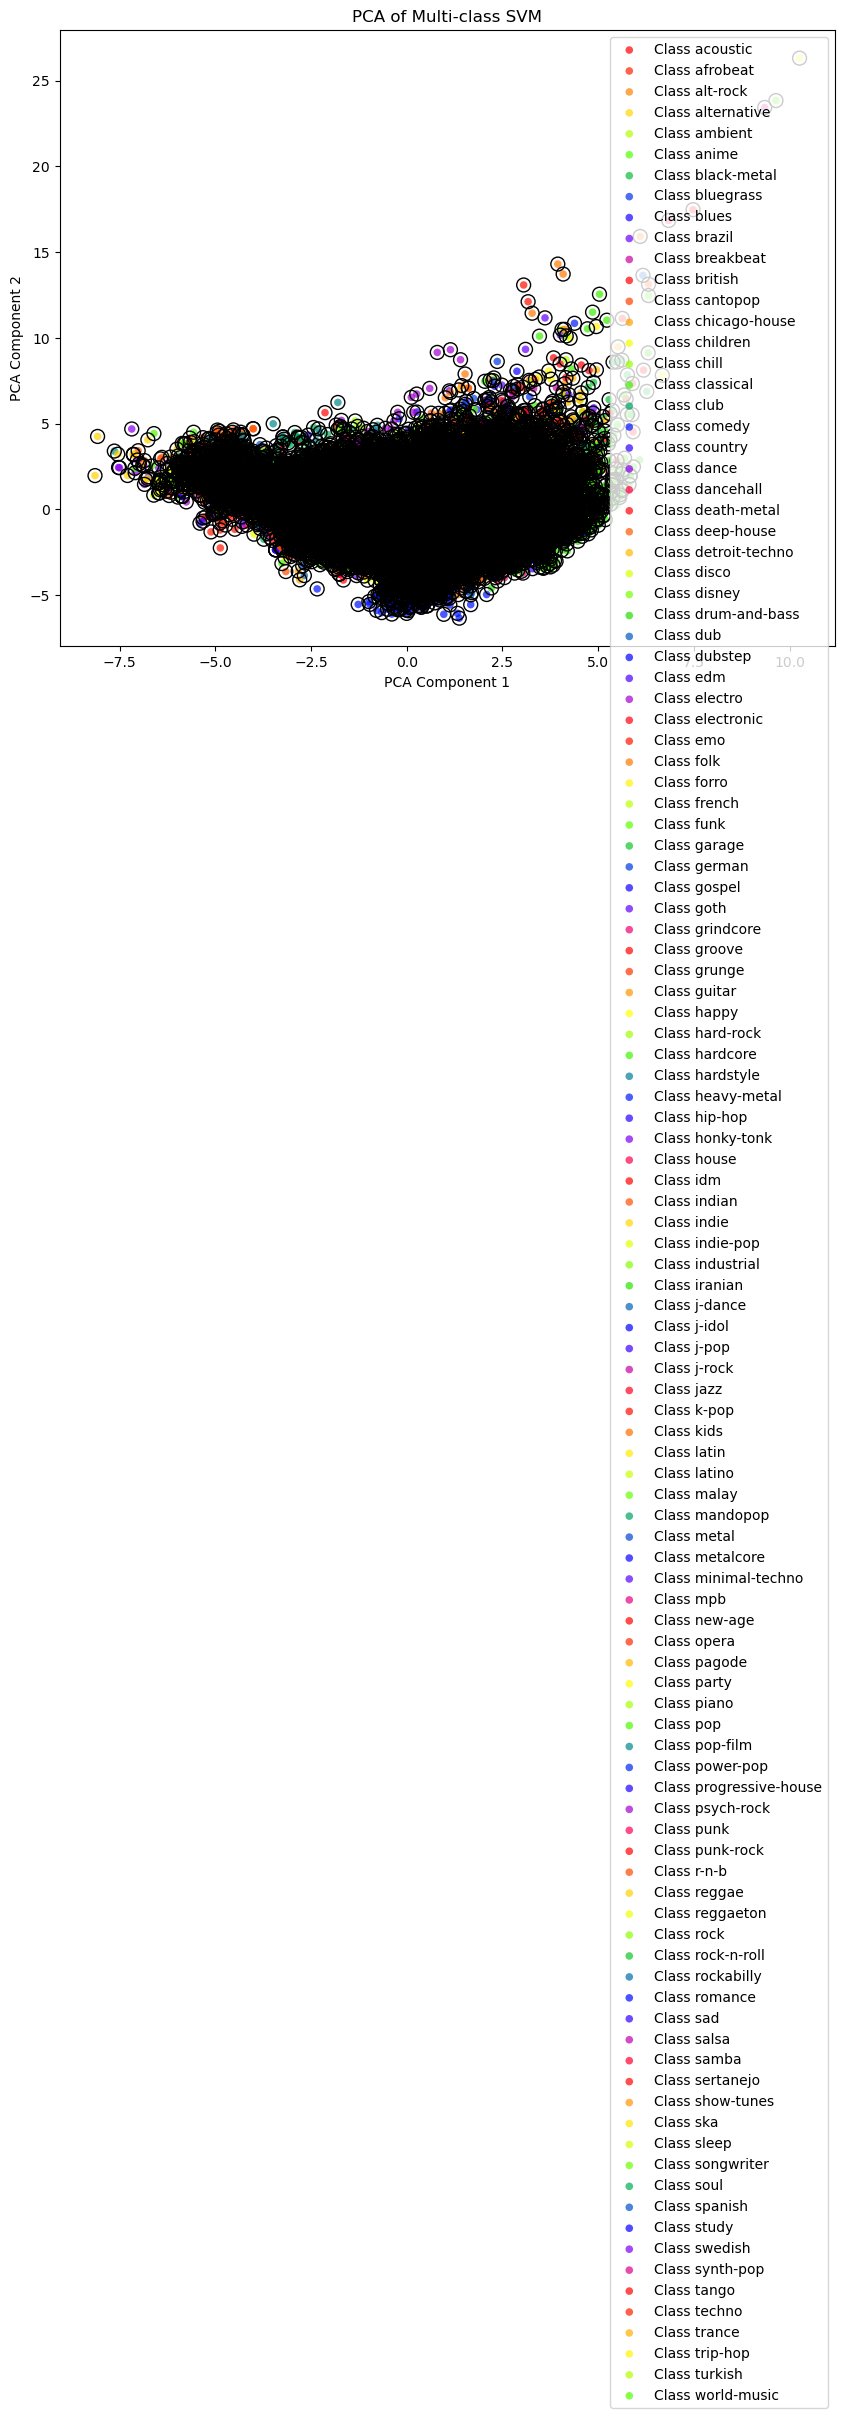

In [36]:
# Map y_train to distinct colors
unique_labels = np.unique(y_train)
colors = plt.cm.prism(np.linspace(0, 1, len(unique_labels)))

# For multi-class, use the appropriate decision function for each class
support_vector_indices = []
for i in range(len(unique_labels)):
    class_decision_function = decision_function[:, i]
    class_support_vector_indices = np.where((y_train == unique_labels[i]) & (class_decision_function <= 1))[0]
    support_vector_indices.extend(class_support_vector_indices)

support_vector_indices = np.array(support_vector_indices)
support_vectors = X_train[support_vector_indices]

# Transform support vectors using PCA
support_vectors_pca = pca.transform(support_vectors)

# Plot the PCA-transformed data
plt.figure(figsize=(10, 8))
for i, label in enumerate(unique_labels):
    indices = np.where(y_train == label)
    plt.scatter(X_pca[indices, 0], X_pca[indices, 1], c=[colors[i]], label=f'Class {label}', edgecolor='none', alpha=0.7, s=30)

# Highlight support vectors
plt.scatter(support_vectors_pca[:, 0], support_vectors_pca[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')

plt.legend()
plt.title('PCA of Multi-class SVM')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [37]:
clf.__dict__

{'dual': True,
 'tol': 0.0001,
 'C': 1.0,
 'multi_class': 'ovr',
 'fit_intercept': True,
 'intercept_scaling': 1,
 'class_weight': None,
 'verbose': 0,
 'random_state': 42,
 'max_iter': 1000,
 'penalty': 'l2',
 'loss': 'squared_hinge',
 'n_features_in_': 15,
 'classes_': array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
        'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
        'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
        'chill', 'classical', 'club', 'comedy', 'country', 'dance',
        'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
        'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
        'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
        'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
        'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
        'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
        'indie', 'indie-

## Nonlinear SVM

#### C = 1, gamma = auto, kernel = rbf

In [6]:
# Instantiate SVC with fixed parameters
clf = SVC(C=1, gamma='auto', kernel='rbf')

# Fit the classifier on the training data
clf.fit(X_train, y_train)

# Evaluate on test set
y_pred = clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy: 0.3311742424242424
F1-score: [0.24625624 0.19546248 0.         0.29955947 0.38935108 0.22356495
 0.4695122  0.29640719 0.15286624 0.16450216 0.24682396 0.05434783
 0.20681265 0.40949555 0.45061728 0.09259259 0.5034965  0.218107
 0.825054   0.32266667 0.42906574 0.15656566 0.26666667 0.15340909
 0.41421947 0.16167665 0.30769231 0.43703704 0.22268908 0.
 0.         0.32850242 0.02797203 0.25632378 0.08737864 0.38617402
 0.14349776 0.28254848 0.15577889 0.28484848 0.25282167 0.03878116
 0.7239819  0.11330049 0.26597132 0.30872483 0.31451613 0.20512821
 0.33796296 0.31010453 0.30946292 0.4222973  0.57668712 0.39555006
 0.32734531 0.33253012 0.27777778 0.1046832  0.19238477 0.73636364
 0.38356164 0.39795918 0.16666667 0.04       0.60385439 0.38618524
 0.45269461 0.12844037 0.         0.197411   0.27678571 0.1025641
 0.31831832 0.2359882  0.01290323 0.47986577 0.41639344 0.35777126
 0.37696335 0.47938144 0.52898551 0.53937008 0.26365348 0.32346241
 0.405      0.         0.09090909 

C:\Users\rugge\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                   precision    recall  f1-score   support

         acoustic       0.22      0.27      0.25       271
         afrobeat       0.20      0.19      0.20       295
         alt-rock       0.00      0.00      0.00        77
      alternative       0.32      0.28      0.30       239
          ambient       0.37      0.42      0.39       281
            anime       0.32      0.17      0.22       217
      black-metal       0.42      0.53      0.47       291
        bluegrass       0.27      0.33      0.30       296
            blues       0.29      0.10      0.15       232
           brazil       0.22      0.13      0.16       292
        breakbeat       0.26      0.23      0.25       293
          british       0.33      0.03      0.05       169
         cantopop       0.15      0.32      0.21       263
    chicago-house       0.36      0.47      0.41       295
         children       0.42      0.49      0.45       297
            chill       0.10      0.08      0.09       

C:\Users\rugge\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rugge\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
clf.support_

In [ ]:
# Assuming y_train_encoded represents integer labels ranging from 0 to 113
# Fit PCA on X_train
pca = PCA(n_components=8)
X_train_pca = pca.fit_transform(X_train)

# Transform support vectors
support_vectors_pca = pca.transform(clf.support_vectors_)

# Plotting
plt.figure(figsize=(10, 8))

# Plot all data points after PCA transformation
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_encoded, cmap='viridis',
            edgecolor='none', alpha=0.7, s=30, label='Data Points')  # Use 'viridis' colormap for example

# Plot support vectors after PCA transformation
plt.scatter(support_vectors_pca[:, 0], support_vectors_pca[:, 1], s=100,
            linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')

plt.title('Data and Support Vectors in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

# Customize color bar with a smooth transition colormap
norm = plt.Normalize(vmin=0, vmax=113)  # Adjust vmin and vmax according to your data range
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ticks=np.linspace(0, 113, num=10), ax=plt.gca())  # Specify ax=plt.gca() to use current Axes

plt.show()


## C= = 1, gamma = auto, kernel = poly

In [8]:
# Instantiate SVC with fixed parameters
clf = SVC(C=1, gamma='auto', kernel='poly')

# Fit the classifier on the training data
clf.fit(X_train, y_train)

# Evaluate on test set
y_pred = clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy: 0.313219696969697
F1-score: [0.24752475 0.22654867 0.         0.2746988  0.41996558 0.25
 0.49501661 0.26202322 0.15238095 0.18473896 0.24418605 0.08040201
 0.14071661 0.42038217 0.42634315 0.10676157 0.51245552 0.21731749
 0.83116883 0.31917632 0.47552448 0.22346369 0.29102167 0.01156069
 0.43826087 0.08823529 0.35185185 0.42307692 0.18230563 0.
 0.0754717  0.31840796 0.02787456 0.24424779 0.07216495 0.375
 0.16166282 0.26461538 0.12435233 0.28828829 0.1572327  0.0531401
 0.73805601 0.14220183 0.27204783 0.3143508  0.29662921 0.20805369
 0.32795699 0.27819549 0.30140845 0.44244604 0.51935484 0.39463087
 0.32997988 0.29850746 0.25688073 0.16272966 0.21355236 0.74584323
 0.39568345 0.30574324 0.1421092  0.02985075 0.61751152 0.36225266
 0.50141643 0.11764706 0.04081633 0.16645327 0.23466667 0.16666667
 0.31889764 0.25386997 0.01408451 0.50457038 0.45224172 0.3171521
 0.33040936 0.52392947 0.55972696 0.47702407 0.27509294 0.29834254
 0.40555556 0.         0.0462963  0.175      

C:\Users\rugge\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                   precision    recall  f1-score   support

         acoustic       0.22      0.28      0.25       271
         afrobeat       0.24      0.22      0.23       295
         alt-rock       0.00      0.00      0.00        77
      alternative       0.32      0.24      0.27       239
          ambient       0.41      0.43      0.42       281
            anime       0.31      0.21      0.25       217
      black-metal       0.48      0.51      0.50       291
        bluegrass       0.26      0.27      0.26       296
            blues       0.29      0.10      0.15       232
           brazil       0.22      0.16      0.18       292
        breakbeat       0.28      0.22      0.24       293
          british       0.27      0.05      0.08       169
         cantopop       0.08      0.41      0.14       263
    chicago-house       0.40      0.45      0.42       295
         children       0.44      0.41      0.43       297
            chill       0.15      0.08      0.11       

C:\Users\rugge\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rugge\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
clf.support_

array([   19,    38,   109, ..., 61293, 61299, 61455])

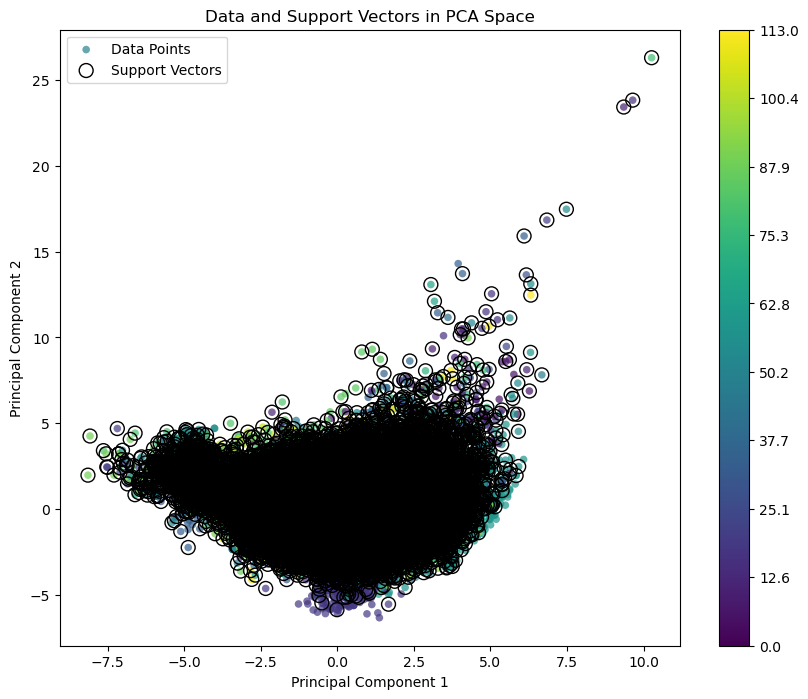

In [16]:
# Fit PCA on X_train
pca = PCA(n_components=8)
X_train_pca = pca.fit_transform(X_train)

# Transform support vectors
support_vectors_pca = pca.transform(clf.support_vectors_)

# Plotting
plt.figure(figsize=(10, 8))

# Plot all data points after PCA transformation
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_encoded, cmap='viridis',
            edgecolor='none', alpha=0.7, s=30, label='Data Points')  # Use 'viridis' colormap for example

# Plot support vectors after PCA transformation
plt.scatter(support_vectors_pca[:, 0], support_vectors_pca[:, 1], s=100,
            linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')

plt.title('Data and Support Vectors in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

# Customize color bar with a smooth transition colormap
norm = plt.Normalize(vmin=0, vmax=113)  # Adjust vmin and vmax according to your data range
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ticks=np.linspace(0, 113, num=10), ax=plt.gca())  # Specify ax=plt.gca() to use current Axes

plt.show()


#### "Explicit" - binary imbalanced classification.

In [3]:
df2 = pd.read_csv(r"\df_classification_clusters.csv")

In [4]:
X = df2.drop(['cluster_label', 'explicit'], axis=1).values
y = np.array(df2['explicit'])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=94, stratify=y)

In [6]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

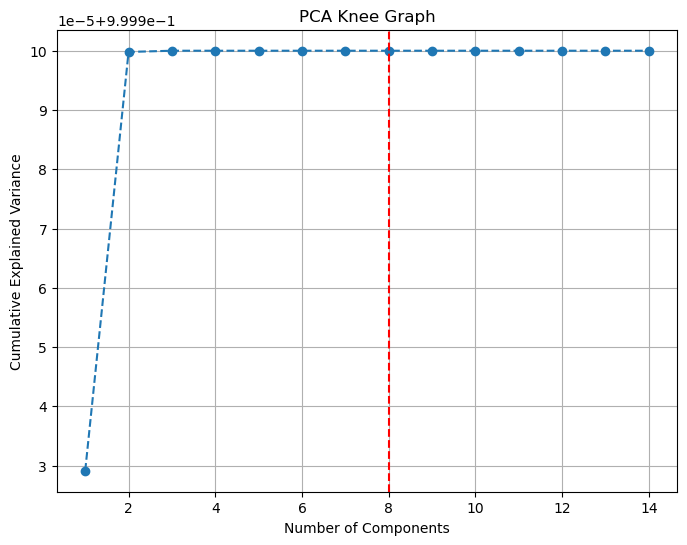

In [14]:
# Assume X_train is already defined
pca = PCA()
pca.fit(X_train)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Plotting the knee graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Knee Graph')
plt.axvline(x=8, color='r', linestyle='--')  # Assuming you want to highlight n_components=2
plt.grid(True)
plt.show()

In [7]:
### Choice n=8.

pca = PCA(n_components=8)
pca.fit(X_train)
X_pca = pca.transform(X_train)

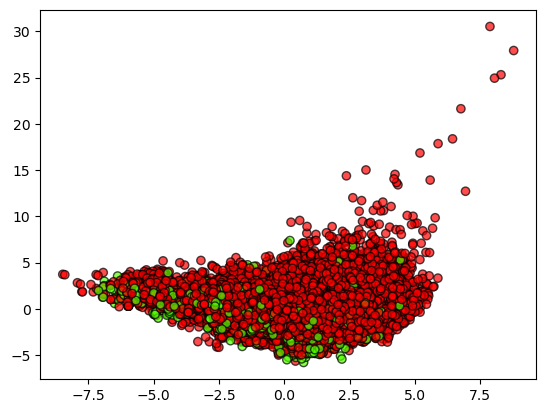

In [8]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

##### Linear SVM

##### C = 1.0

In [21]:
clf = LinearSVC(C=1.0, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

C:\Users\rugge\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy 0.9153030303030303
F1-score [0.95554142 0.10774142]
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     24126
         1.0       0.58      0.06      0.11      2274

    accuracy                           0.92     26400
   macro avg       0.75      0.53      0.53     26400
weighted avg       0.89      0.92      0.88     26400



##### C = 0.1

In [22]:
clf = LinearSVC(C=0.1, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9153030303030303
F1-score [0.95554142 0.10774142]
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     24126
         1.0       0.58      0.06      0.11      2274

    accuracy                           0.92     26400
   macro avg       0.75      0.53      0.53     26400
weighted avg       0.89      0.92      0.88     26400



C:\Users\rugge\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


##### C = 0.001

In [24]:
clf = LinearSVC(C=0.001, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.915340909090909
F1-score [0.95556395 0.10707151]
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     24126
         1.0       0.59      0.06      0.11      2274

    accuracy                           0.92     26400
   macro avg       0.75      0.53      0.53     26400
weighted avg       0.89      0.92      0.88     26400



##### C = 100 

In [26]:
clf = LinearSVC(C=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9067045454545455
F1-score [0.95095482 0.04571871]
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     24126
         1.0       0.19      0.03      0.05      2274

    accuracy                           0.91     26400
   macro avg       0.55      0.51      0.50     26400
weighted avg       0.85      0.91      0.87     26400



C:\Users\rugge\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#### Random Search (+ RandomOversample)

In [9]:
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

In [10]:
# Define the classifier
clf = LinearSVC(random_state=42)

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'C': uniform(0.001, 1.0)  # Uniform distribution for parameter C
}

# Define RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_grid, n_iter=10, 
                                   scoring='f1_macro', cv=5, random_state=42)

# Perform RandomizedSearchCV with resampled data
random_search.fit(X_train_resampled, y_train_resampled)


C:\Users\rugge\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\rugge\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\rugge\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\rugge\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\rugge\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\rugge\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number 

RandomizedSearchCV(cv=5, estimator=LinearSVC(random_state=42),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002EF538BB410>},
                   random_state=42, scoring='f1_macro')

In [11]:
# Get the best estimator from random search
best_clf = random_search.best_estimator_

# Predict on the test set
y_pred = best_clf.predict(X_test)

# Print evaluation metrics
print('Best Parameters:', random_search.best_params_)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))


Best Parameters: {'C': 0.15701864044243652}
Accuracy: 0.7561742424242425
F1-score: [0.85043797 0.34053888]
              precision    recall  f1-score   support

         0.0       0.97      0.76      0.85     24126
         1.0       0.22      0.73      0.34      2274

    accuracy                           0.76     26400
   macro avg       0.59      0.74      0.60     26400
weighted avg       0.90      0.76      0.81     26400



#### Random Search + ADASYN

In [12]:
# Initialize ADASYN oversampler
oversampler = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)


In [ ]:
# Define the classifier
clf = LinearSVC(random_state=42)

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'C': uniform(0.001, 1.0)  # Uniform distribution for parameter C
}

# Define RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_grid, n_iter=50, 
                                   scoring='f1_macro', cv=5, random_state=42)

# Perform RandomizedSearchCV with resampled data
random_search.fit(X_train_resampled, y_train_resampled)


In [ ]:
# Get the best estimator from random search
best_clf = random_search.best_estimator_

# Predict on the test set
y_pred = best_clf.predict(X_test)

# Print evaluation metrics
print('Best Parameters:', random_search.best_params_)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))


##### NonLinear SVM

##### Grid Search

In [8]:
param_grid = {
    'C': [0.1, 1, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'poly']
}

clf = SVC()
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)
best_clf = grid_search.best_estimator_

# Evaluate on test set
y_pred = best_clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters found: {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
Accuracy: 0.9194318181818182
F1-score: [0.95726427 0.29778805]
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96     24126
         1.0       0.60      0.20      0.30      2274

    accuracy                           0.92     26400
   macro avg       0.76      0.59      0.63     26400
weighted avg       0.90      0.92      0.90     26400



### Trial and Errors

##### Same Grid Search parameters, but Random OverSampling.

In [ ]:
# Apply random oversampling to the training data
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Train the SVM with the specified parameters
best_clf = SVC(C=100, gamma='auto', kernel='rbf')
best_clf.fit(X_train_resampled, y_train_resampled)

# Evaluate on the test set
y_pred = best_clf.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

###### Probably gamma = 'scale is better because it's Adaptive to Feature Variance and Robust; hence is an adaptive approach particularly useful when dataset has been modified through techniques like oversampling.

##### Gamma = scale, kernel = 'rbf', C much smaller (I do not want to overfit, risk of underfitting!)

In [15]:
# Apply random oversampling to the training data
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Train the SVM with the specified parameters
best_clf = SVC(C=0.001, gamma='scale', kernel='rbf')
best_clf.fit(X_train_resampled, y_train_resampled)

# Evaluate on the test set
y_pred = best_clf.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy: 0.7834848484848485
F1-score: [0.87000819 0.35251473]
              precision    recall  f1-score   support

         0.0       0.96      0.79      0.87     24126
         1.0       0.24      0.68      0.35      2274

    accuracy                           0.78     26400
   macro avg       0.60      0.74      0.61     26400
weighted avg       0.90      0.78      0.83     26400



In [16]:
# Apply random oversampling to the training data
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Train the SVM with the specified parameters
best_clf = SVC(C=0.1, gamma='scale', kernel='rbf')
best_clf.fit(X_train_resampled, y_train_resampled)

# Evaluate on the test set
y_pred = best_clf.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy: 0.7560227272727272
F1-score: [0.8495691  0.35480317]
              precision    recall  f1-score   support

         0.0       0.97      0.75      0.85     24126
         1.0       0.23      0.78      0.35      2274

    accuracy                           0.76     26400
   macro avg       0.60      0.77      0.60     26400
weighted avg       0.91      0.76      0.81     26400

